<a href="https://colab.research.google.com/github/szh141/Test/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

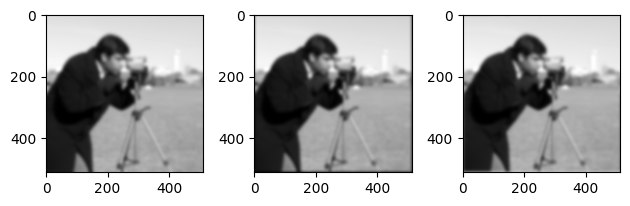

In [ ]:
from skimage import filters,data
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import convolve2d

img1 = data.camera()

"""
gauss = np.zeros(img1.shape)
gauss[img1.shape[0]//2,img1.shape[1]//2] = 1
gauss_mask = filters.gaussian(gauss,sigma=5)
"""

# 132
gauss = np.zeros((25,25))
gauss[12,12] = 1
gauss_mask = filters.gaussian(gauss,sigma=5)

# 133
gauss2 = np.zeros(img1.shape)
gauss2[img1.shape[0]//2,img1.shape[1]//2] = 1
gauss_mask2 = filters.gaussian(gauss2,sigma=5)
gauss_shift = np.fft.fftshift(gauss_mask2)
img_convolved = np.fft.ifft2(np.fft.fft2(img1) * np.fft.fft2(gauss_shift))

plt.subplot(131)
plt.imshow(filters.gaussian(img1,sigma=5),cmap='gray')
plt.subplot(132)
plt.imshow(convolve2d(img1,gauss_mask,mode='same'),cmap='gray')
plt.subplot(133)
plt.imshow(img_convolved.real,cmap='gray')
plt.tight_layout()
plt.show()

############################################

a separate question on partial derivative of LoG filter

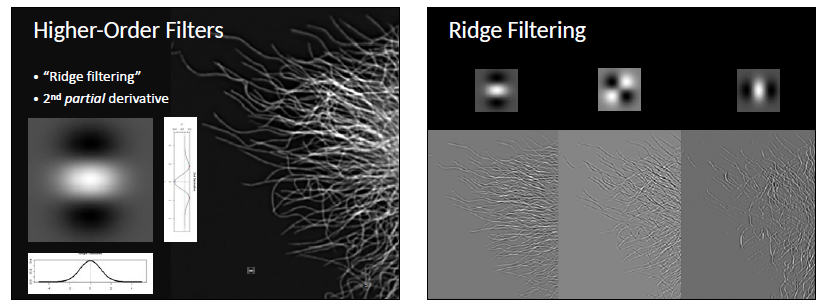

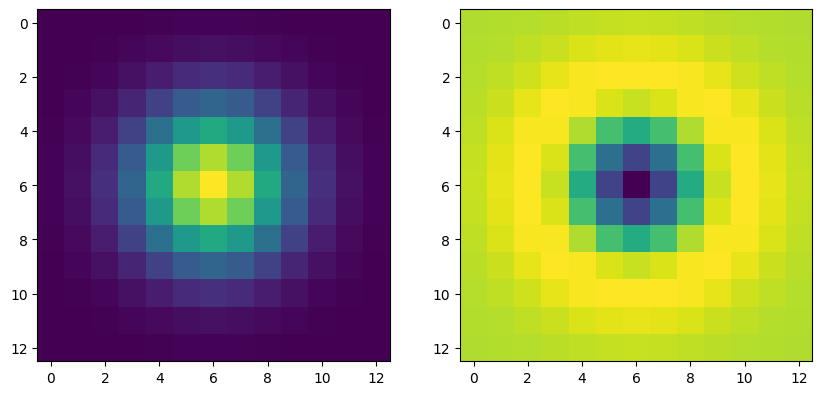

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import filters, data


sigma = 2
size = int(6 * sigma + 1)

# Gaussian
x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(-size//2+1, size//2+1))
kernel_G = 1/(sigma*np.sqrt(np.pi)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
kernel_G = kernel_G / np.sum(np.abs(kernel_G))

# LoG
x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(-size//2+1, size//2+1))
kernel_LoG = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
kernel_LoG = kernel_LoG / np.sum(np.abs(kernel_LoG))

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(kernel_G)
ax[1].imshow(kernel_LoG)
